In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data.db',
                                       mask='data/synthetic_data/nifti_files/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='data/synthetic_data/nifti_files/wholebrain.nii.gz', num_factors=20, embedding_dim=2)

01/09/2019 10:55:44 Loading Nifti image data/synthetic_data/nifti_files/subject_5_task_1.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
01/09/2019 10:55:46 Loading Nifti image data/synthetic_data/nifti_files/subject_17_task_2.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
01/09/2019 10:55:48 Loading Nifti image data/synthetic_data/nifti_files/subject_20_task_2.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
01/09/2019 10:55:51 Loading Nifti image data/synthetic_data/nifti_files/subject_6_task_2.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
01/09/2019 10:55:53 Loading Nifti image data/synthetic_data/nifti_files/subject_11_task_2.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
01/09/2019 10:55:55 Loading Nifti image data/synthetic_data/nifti_files/subject_4_task_2.nii

In [6]:
dtfa.load_state('data/synthetic_k20_n1000_01082019_233832')

In [7]:
def validation_set_filter(block):
    # Our training set consists of subjects 1-20.  21-30 are the validation set.
    return block.subject > 20

In [8]:
losses = dtfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=9, patience=50,
                    blocks_filter=validation_set_filter, train_generative=False)

01/09/2019 10:58:22 [Epoch 1] (7027ms) Posterior free-energy 2.91151898e+09 = KL from prior 6.86838800e+06 - log-likelihood -2.90465050e+09
01/09/2019 10:58:29 [Epoch 2] (6762ms) Posterior free-energy 2.81492070e+09 = KL from prior 1.00789490e+07 - log-likelihood -2.80484173e+09
01/09/2019 10:58:35 [Epoch 3] (6413ms) Posterior free-energy 2.74454016e+09 = KL from prior 6.79313250e+06 - log-likelihood -2.73774720e+09
01/09/2019 10:58:42 [Epoch 4] (6415ms) Posterior free-energy 2.71822899e+09 = KL from prior 7.47874600e+06 - log-likelihood -2.71075072e+09
01/09/2019 10:58:48 [Epoch 5] (6409ms) Posterior free-energy 2.66508058e+09 = KL from prior 6.46052350e+06 - log-likelihood -2.65862016e+09
01/09/2019 10:58:55 [Epoch 6] (6404ms) Posterior free-energy 2.60950758e+09 = KL from prior 5.89903350e+06 - log-likelihood -2.60360832e+09
01/09/2019 10:59:01 [Epoch 7] (6447ms) Posterior free-energy 2.54574694e+09 = KL from prior 1.24112380e+07 - log-likelihood -2.53333581e+09
01/09/2019 10:59:08 

In [9]:
dtfa.normalize_activations()

[tensor(35.4537),
 tensor(38.3096),
 tensor(24.8574),
 tensor(70.0717),
 tensor(27.1458),
 tensor(37.7904),
 tensor(29.4101),
 tensor(32.3829),
 tensor(63.4551),
 tensor(11.4074),
 tensor(11.4074),
 tensor(39.0929),
 tensor(44.9267),
 tensor(24.8574),
 tensor(31.4188),
 tensor(22.0995),
 tensor(23.1583),
 tensor(44.6713),
 tensor(38.3096),
 tensor(37.5712),
 tensor(37.5712),
 tensor(32.3829),
 tensor(37.5947),
 tensor(22.0995),
 tensor(24.7497),
 tensor(63.4551),
 tensor(44.6713),
 tensor(27.1458),
 tensor(74.0087),
 tensor(70.0717),
 tensor(23.1583),
 tensor(31.4188),
 tensor(44.9267),
 tensor(35.4537),
 tensor(37.7904),
 tensor(24.7497),
 tensor(29.4101),
 tensor(37.5947),
 tensor(39.0929),
 tensor(74.0087),
 tensor(19.4622),
 tensor(19.4622),
 tensor(41.3775),
 tensor(29.6731),
 tensor(36.3397),
 tensor(25.8250),
 tensor(30.5526),
 tensor(36.3397),
 tensor(30.5526),
 tensor(29.6731),
 tensor(19.9918),
 tensor(34.1081),
 tensor(42.3914),
 tensor(41.3775),
 tensor(28.5821),
 tensor(42

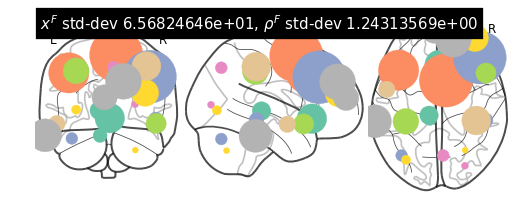

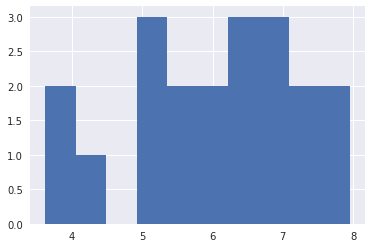

(<nilearn.plotting.displays.OrthoProjector at 0x7f0690320d68>,
 tensor([[ -9.5424, -27.9912,  -0.9109],
         [  1.5370,  24.9994,  -9.0215],
         [ -8.6545, -31.3318, -27.3148],
         [  8.3348,   8.6344,  57.3381],
         [-41.5575,  19.4163,  38.5927],
         [ 49.9674, -33.2921, -10.3580],
         [-38.3744, -70.2838, -30.3952],
         [ 43.8820,  32.6298,  34.5920],
         [ 28.2043, -81.1114,   5.6310],
         [  5.3163, -70.3335,  44.5637],
         [-33.9491, -34.4770,  40.7150],
         [ 50.3246,  16.3432, -14.5409],
         [-33.7940, -74.9275,  -0.1610],
         [ 38.7379,  53.2741,  17.5556],
         [ 28.4115, -64.7542, -42.6177],
         [-54.0955,  -0.8741, -14.8774],
         [ 40.0950, -33.5333,  45.7015],
         [ 15.8935,  52.0015,  29.7494],
         [ -3.9173,  61.0007,  12.8713],
         [-66.4833, -34.3192, -27.0947]]),
 tensor([5.8412, 6.7785, 5.2770, 7.9530, 7.3951, 5.3826, 4.9465, 7.9333, 3.9194,
         4.9676, 6.5058, 6.0145, 4

In [10]:
dtfa.visualize_factor_embedding()

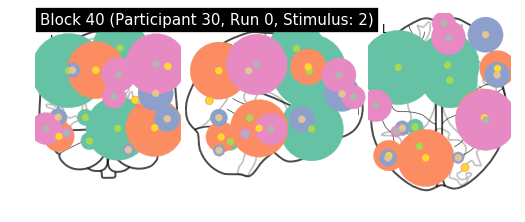

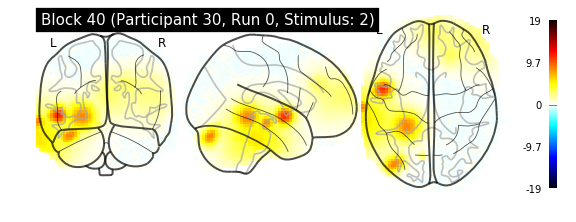

01/09/2019 11:52:27 Reconstruction Error (Frobenius Norm): 2.21130762e+03 out of 7.11559814e+03


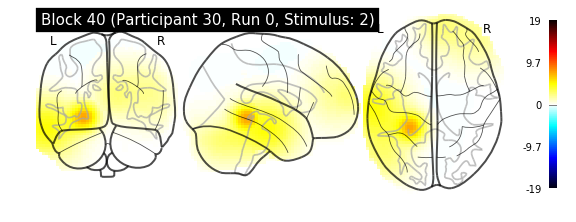

{'weights': tensor([[ 6.9958e+00, -7.2077e-03, -7.7109e-01,  ...,  6.2627e-01,
          1.8978e+00, -2.0822e-01],
        [ 7.0739e+00,  3.2390e-01, -7.5259e-01,  ...,  8.6173e-01,
          3.7686e-02,  2.7082e+00],
        [ 8.2290e+00, -4.0318e-01, -5.8978e-01,  ...,  1.6615e-01,
          1.7486e-01,  1.7362e+00],
        ...,
        [ 5.2548e+00,  4.3412e-01, -5.2553e-01,  ...,  8.2725e-01,
          6.8997e-01,  1.6165e+00],
        [ 7.7437e+00, -9.7467e-01, -6.2232e-01,  ..., -7.6163e-01,
          4.5835e-01,  1.2654e+00],
        [ 9.3088e+00,  2.8963e-01, -7.6564e-01,  ...,  2.8880e-01,
          2.1169e+00,  1.3646e+00]]), 'factors': tensor([[2.7334e-05, 2.3417e-05, 1.8718e-05,  ..., 5.8551e-20, 8.7314e-20,
         4.4312e-20],
        [3.8578e-02, 3.7539e-02, 3.6367e-02,  ..., 1.3652e-01, 1.3764e-01,
         1.4768e-01],
        [2.1750e-07, 1.0743e-07, 4.9654e-08,  ..., 2.3290e-18, 1.9569e-18,
         1.1332e-18],
        ...,
        [2.8999e-07, 3.4519e-07, 4.0533e

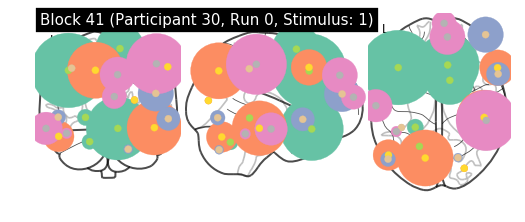

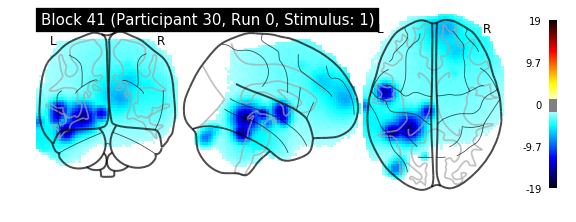

01/09/2019 11:52:55 Reconstruction Error (Frobenius Norm): 2.67932471e+03 out of 9.54044141e+03


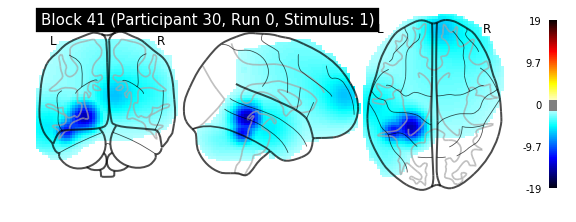

{'weights': tensor([[-12.9127,  -0.9470,   0.3628,  ...,  -1.1329,  -4.0842,  -8.0648],
        [ -9.9824,  -0.7438,   0.3071,  ...,  -0.2813,  -2.3830,  -8.2538],
        [-10.3978,  -0.3590,   0.5586,  ...,  -0.2842,  -0.9372,  -9.0029],
        ...,
        [-12.9471,  -0.1177,   0.7026,  ...,  -0.0780,  -1.7879,  -8.9614],
        [-10.7978,  -0.8705,   0.4093,  ...,   0.0737,  -0.3111,  -7.5303],
        [-11.1658,  -0.3608,   0.5435,  ...,  -0.3755,  -1.0110,  -8.5999]]), 'factors': tensor([[3.9127e-05, 3.3653e-05, 2.7061e-05,  ..., 1.7938e-19, 2.6439e-19,
         1.3688e-19],
        [3.8174e-02, 3.7145e-02, 3.5983e-02,  ..., 1.3339e-01, 1.3450e-01,
         1.4438e-01],
        [1.7789e-08, 7.9217e-09, 3.2662e-09,  ..., 4.9084e-21, 4.0476e-21,
         2.1354e-21],
        ...,
        [1.0270e-07, 1.2399e-07, 1.4750e-07,  ..., 2.2488e-06, 3.0531e-06,
         3.3507e-06],
        [6.7262e-16, 7.8236e-16, 8.8343e-16,  ..., 6.4008e-13, 9.4364e-13,
         1.6746e-12],
        

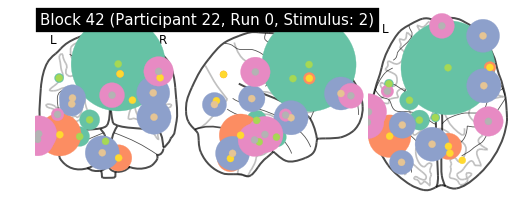

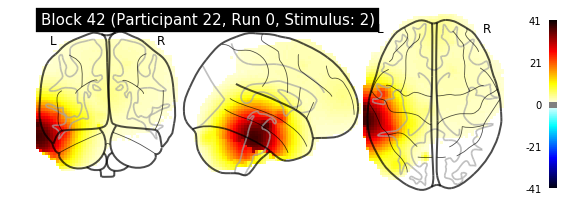

01/09/2019 11:53:23 Reconstruction Error (Frobenius Norm): 2.11988745e+03 out of 2.63910801e+04


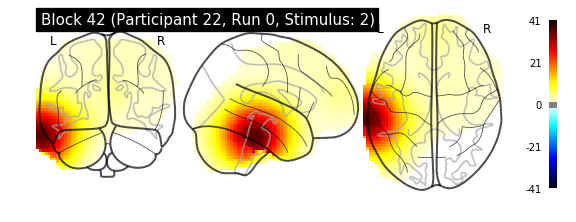

{'weights': tensor([[ 0.8435, -1.1276,  0.1594,  ...,  2.7613,  2.5870, 16.4463],
        [-1.0157, -1.1915,  0.1844,  ...,  2.5036,  1.5685, 15.9967],
        [ 0.0891, -1.6507, -0.1856,  ..., -0.2045,  2.1641, 16.0995],
        ...,
        [-1.1536, -1.5715,  0.4019,  ...,  3.5047,  2.2140, 15.9627],
        [-0.1111, -1.5058,  0.3721,  ..., -0.0775,  2.8908, 15.4754],
        [ 1.4112, -1.7096,  0.3216,  ...,  0.2537,  2.7052, 15.7465]]), 'factors': tensor([[1.6324e-04, 1.4186e-04, 1.1777e-04,  ..., 3.1009e-12, 3.8857e-12,
         2.8894e-12],
        [2.0053e-05, 1.3090e-05, 8.1555e-06,  ..., 5.7417e-15, 5.4432e-15,
         7.3688e-15],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [4.0746e-15, 4.7936e-15, 5.4755e-15,  ..., 9.8642e-13, 1.4696e-12,
         2.4937e-12],
        [2.6765e-08, 2.3175e-08, 1.7930e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.9997e-01, 3.4196e-01, 2.8781e-01,

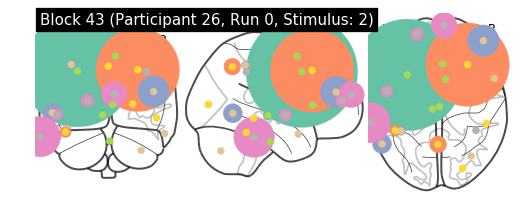

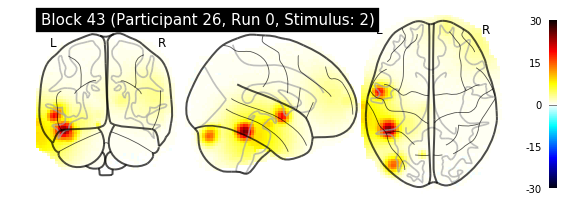

01/09/2019 11:53:51 Reconstruction Error (Frobenius Norm): 2.83304639e+03 out of 1.08085703e+04


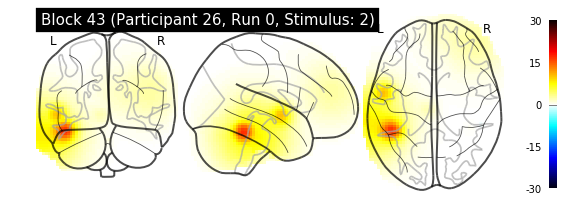

{'weights': tensor([[ 1.7601, -0.1918, -1.1633,  ...,  1.0143,  0.1407,  8.2037],
        [ 3.0068, -0.0942,  1.5784,  ...,  1.6979,  0.6151, 10.8364],
        [ 1.9142, -0.0223, -0.3473,  ..., -1.5826, -0.0241,  7.2951],
        ...,
        [ 1.8792, -0.1997, -1.0077,  ..., -0.7958, -0.1264,  8.8181],
        [ 1.8230, -0.0211, -1.0507,  ...,  0.7625,  0.2372,  7.9773],
        [ 2.0258,  0.0152,  1.2246,  ...,  1.2342,  0.1280,  7.4905]]), 'factors': tensor([[5.3932e-27, 4.1162e-27, 2.5897e-27,  ..., 1.3768e-38, 4.9318e-38,
         2.1892e-38],
        [3.3314e-32, 4.0407e-32, 4.4050e-32,  ..., 2.5979e-25, 7.3946e-25,
         1.6932e-24],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [4.4737e-14, 5.2263e-14, 5.9450e-14,  ..., 1.6904e-11, 2.4441e-11,
         3.9307e-11],
        [2.8545e-15, 3.3148e-15, 3.6937e-15,  ..., 3.9947e-20, 6.4521e-20,
         1.2933e-19],
        [5.8298e-01, 5.2832e-01, 4.7354e-01,

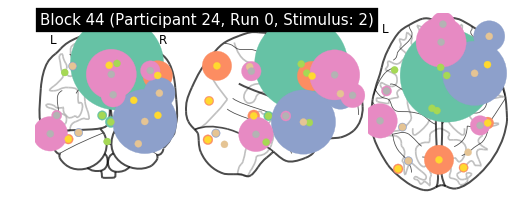

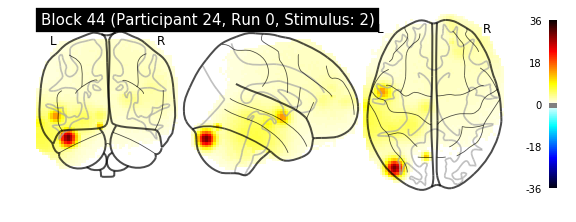

01/09/2019 11:54:19 Reconstruction Error (Frobenius Norm): 1.94244812e+03 out of 8.88719434e+03


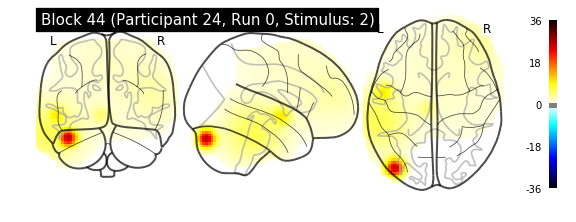

{'weights': tensor([[ 3.9855e+00,  5.3830e-01, -5.5865e-01,  ...,  7.9525e-02,
         -1.8320e-01,  5.7328e+00],
        [ 4.8409e+00, -3.6500e-01, -2.6831e-01,  ...,  1.5165e-01,
          2.4486e+00,  4.9518e+00],
        [ 3.8233e+00,  8.6884e-02, -6.2537e-01,  ..., -2.1122e-01,
         -1.6241e+00,  5.7854e+00],
        ...,
        [ 4.2785e+00, -1.8502e-01, -5.3395e-01,  ...,  2.3768e-01,
          2.5323e+00,  5.2148e+00],
        [ 5.5884e+00, -1.6988e-01, -8.9692e-01,  ...,  1.9181e-01,
          1.0391e+00,  4.7752e+00],
        [ 5.5277e+00, -2.6435e-03, -1.5790e-01,  ...,  1.0227e-01,
          1.5574e+00,  4.5349e+00]]), 'factors': tensor([[9.1370e-28, 6.6521e-28, 3.9690e-28,  ..., 6.0519e-40, 2.1672e-39,
         1.0157e-39],
        [8.1198e-28, 5.2758e-28, 3.0910e-28,  ..., 2.7392e-22, 4.0712e-22,
         1.3554e-21],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [8.5636e-04, 9.4137e-04, 1.0274e

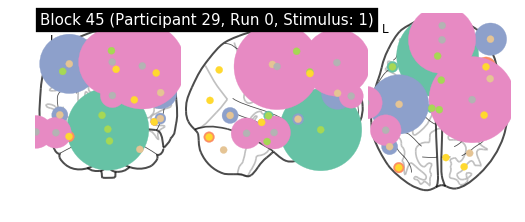

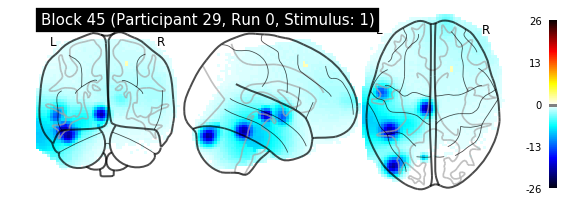

01/09/2019 11:54:47 Reconstruction Error (Frobenius Norm): 2.77859497e+03 out of 9.81504688e+03


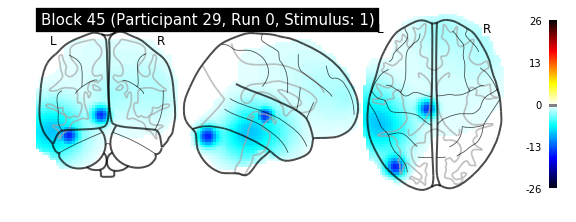

{'weights': tensor([[-13.4194,  -0.3327,   0.4890,  ...,  -0.3932,  -1.3657,  -7.4944],
        [-12.7019,  -0.2953,   0.0986,  ...,  -0.9349,   0.3725,  -8.4624],
        [-11.7757,   0.3309,  -0.4217,  ...,   0.6189,   2.4423,  -7.1823],
        ...,
        [-14.8529,   0.4011,  -0.0431,  ...,   0.7288,   1.9880,  -7.2001],
        [-14.2269,   0.5541,   0.1936,  ...,   0.7092,  -1.2676,  -8.4609],
        [-14.6575,  -0.3295,  -0.4254,  ...,  -0.7342,  -0.4809,  -8.3311]]), 'factors': tensor([[1.2634e-26, 9.4156e-27, 5.7932e-27,  ..., 1.1279e-38, 3.8937e-38,
         1.8617e-38],
        [1.3968e-01, 1.3728e-01, 1.3456e-01,  ..., 1.9622e-01, 1.9706e-01,
         2.0763e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.2185e-02, 1.3067e-02, 1.3956e-02,  ..., 1.5606e-02, 1.7292e-02,
         1.7385e-02],
        [7.2058e-15, 8.4207e-15, 9.5618e-15,  ..., 1.9013e-12, 2.7967e-12,
         4.7188e-12],
        

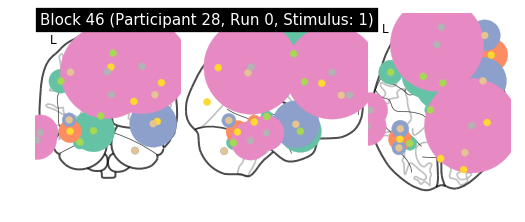

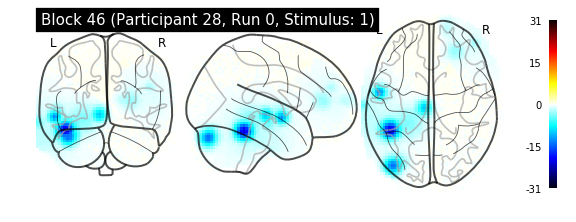

01/09/2019 11:55:15 Reconstruction Error (Frobenius Norm): 3.27536719e+03 out of 7.77138086e+03


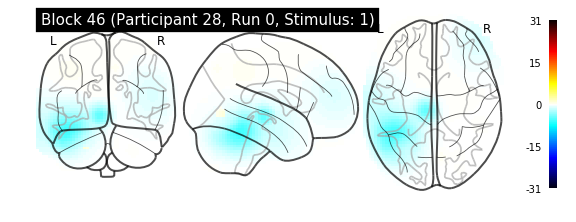

{'weights': tensor([[-4.9495, -0.0244,  4.7671,  ...,  0.1064,  0.1327,  1.5119],
        [-5.2035, -0.1771,  5.6679,  ..., -1.0916, -0.9257,  1.8660],
        [-3.6521,  0.0654,  4.7142,  ...,  0.4583, -0.7952,  0.7962],
        ...,
        [-3.9375, -0.2188,  5.3475,  ..., -2.0958, -0.2049,  2.8027],
        [-3.5119, -0.0307,  5.0431,  ..., -1.7028, -2.4465,  4.9236],
        [-5.9837,  0.1026,  6.8613,  ...,  1.0008,  0.0713,  4.4904]]), 'factors': tensor([[2.8608e-16, 2.3175e-16, 1.6638e-16,  ..., 4.1568e-25, 8.8476e-25,
         5.3080e-25],
        [1.0104e-03, 9.1106e-04, 8.0899e-04,  ..., 6.7298e-05, 6.8581e-05,
         8.3614e-05],
        [9.2142e-08, 3.2936e-08, 1.0714e-08,  ..., 2.5514e-30, 1.9384e-30,
         1.0232e-30],
        ...,
        [1.6364e-01, 1.6810e-01, 1.7234e-01,  ..., 1.5786e-01, 1.6471e-01,
         1.6571e-01],
        [3.8697e-15, 4.6046e-15, 5.3173e-15,  ..., 6.5799e-13, 9.9534e-13,
         1.6719e-12],
        [5.2427e-01, 4.6427e-01, 4.0628e-01,

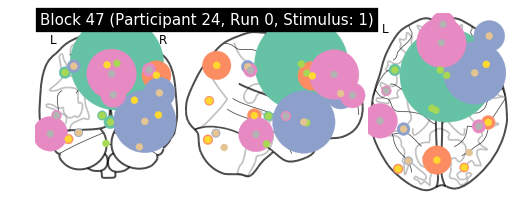

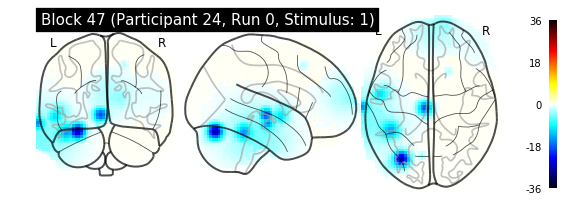

01/09/2019 11:55:43 Reconstruction Error (Frobenius Norm): 2.22539404e+03 out of 8.88816602e+03


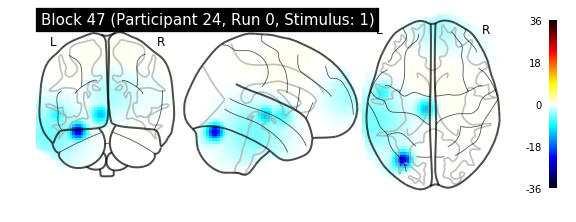

{'weights': tensor([[-1.3010e+01,  2.9924e-02,  7.2048e-01,  ..., -3.6383e-02,
         -3.2671e+00, -4.9286e+00],
        [-1.2209e+01,  1.0662e-01,  2.5550e-01,  ..., -3.0849e-02,
         -1.8968e+00, -6.7430e+00],
        [-1.4586e+01,  4.4668e-03,  3.4681e-01,  ...,  6.4211e-02,
          3.4019e+00, -4.3334e+00],
        ...,
        [-1.5767e+01, -1.0133e-01,  5.7049e-01,  ..., -1.8457e-01,
         -2.0923e+00, -5.9488e+00],
        [-1.4138e+01, -1.8634e-01,  2.1521e-01,  ..., -2.8821e-01,
         -9.4074e-01, -4.2846e+00],
        [-1.2953e+01,  7.1400e-02,  6.0983e-01,  ...,  3.2546e-02,
         -3.4480e+00, -6.5821e+00]]), 'factors': tensor([[7.0975e-28, 5.1662e-28, 3.0788e-28,  ..., 3.8031e-40, 1.3714e-39,
         6.4005e-40],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.1603e-03, 1.2659e-03, 1.3718e

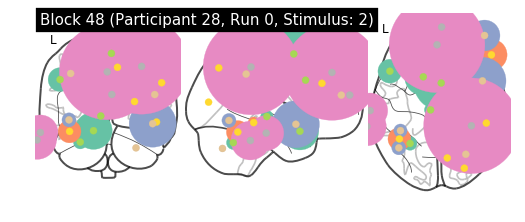

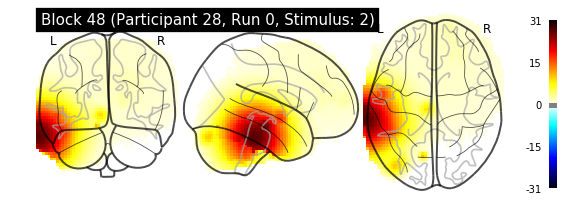

01/09/2019 11:56:11 Reconstruction Error (Frobenius Norm): 1.86122852e+03 out of 1.97192852e+04


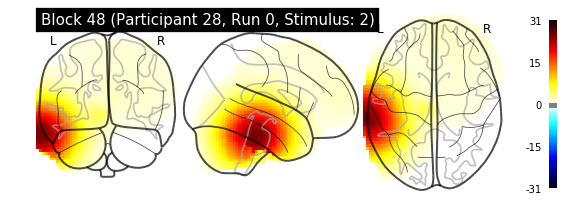

{'weights': tensor([[ 3.5711,  0.1330, -2.4185,  ...,  0.8677,  0.7077, 13.4279],
        [ 3.4606, -0.0391, -1.5598,  ..., -0.3680,  0.7209, 13.8748],
        [ 4.4424,  0.0906, -2.0286,  ...,  1.0784,  1.9263, 13.9650],
        ...,
        [ 2.1424,  0.0196, -1.6998,  ...,  0.1264,  2.8324, 14.6090],
        [ 2.3688,  0.1510, -2.0266,  ...,  0.6456,  1.6896, 13.7181],
        [ 5.2311,  0.4029, -1.8487,  ...,  2.2267,  0.6571, 11.6725]]), 'factors': tensor([[3.4679e-15, 2.8565e-15, 2.1030e-15,  ..., 2.1933e-23, 4.4347e-23,
         2.7552e-23],
        [5.6356e-03, 5.2072e-03, 4.7560e-03,  ..., 7.1635e-04, 7.2624e-04,
         8.4235e-04],
        [1.1339e-07, 4.0910e-08, 1.3443e-08,  ..., 3.8385e-30, 2.9262e-30,
         1.5535e-30],
        ...,
        [1.5721e-01, 1.6159e-01, 1.6577e-01,  ..., 1.5180e-01, 1.5854e-01,
         1.5951e-01],
        [8.1657e-15, 9.6777e-15, 1.1138e-14,  ..., 1.3055e-12, 1.9564e-12,
         3.2459e-12],
        [5.2273e-01, 4.6277e-01, 4.0483e-01,

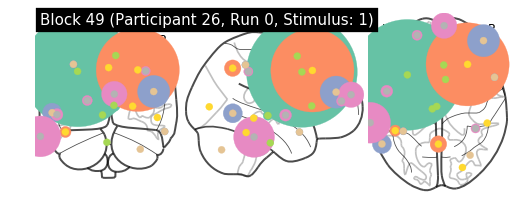

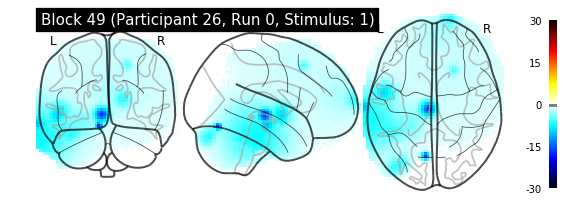

01/09/2019 11:56:39 Reconstruction Error (Frobenius Norm): 1.76930969e+03 out of 7.51167383e+03


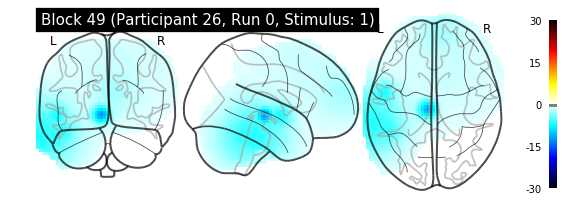

{'weights': tensor([[-1.0705e+01, -1.5893e-01, -6.4974e-01,  ..., -1.5787e+00,
          5.7197e-03, -6.2169e+00],
        [-1.0415e+01,  3.9495e-01,  2.3130e-01,  ..., -1.9911e-01,
         -1.9005e-01, -7.3318e+00],
        [-8.1079e+00,  3.2260e-01,  4.2545e-01,  ..., -2.7703e+00,
         -6.0179e-02, -6.7728e+00],
        ...,
        [-1.0034e+01,  1.8679e-01,  4.3164e-01,  ..., -2.5889e+00,
         -3.6657e-01, -6.1767e+00],
        [-1.0047e+01,  1.1486e-01,  2.3362e-01,  ..., -1.8016e+00,
          3.0859e-02, -6.8585e+00],
        [-1.0357e+01,  2.6657e-01, -5.2295e-01,  ..., -3.8684e+00,
         -4.0363e-01, -7.8472e+00]]), 'factors': tensor([[1.8379e-27, 1.3995e-27, 8.7550e-28,  ..., 2.9154e-39, 1.0708e-38,
         4.6737e-39],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.1997e-36, 5.5748e-36,
         1.9603e-35],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [6.2026e-14, 7.2475e-14, 8.2468e

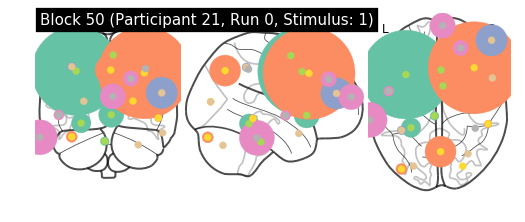

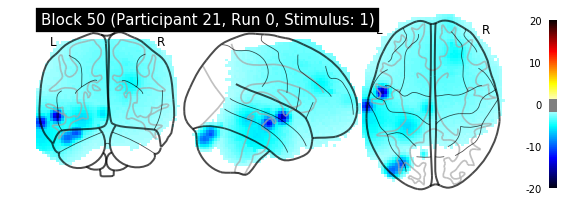

01/09/2019 11:57:07 Reconstruction Error (Frobenius Norm): 1.25383826e+03 out of 6.85666260e+03


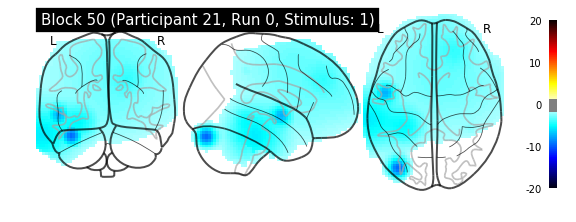

{'weights': tensor([[-3.0598, -0.2946, -0.2576,  ..., -1.3406, -0.6512, -4.9062],
        [ 0.3403,  0.0222, -0.0575,  ...,  0.5973, -1.3860, -3.8721],
        [-2.2064,  0.0371,  0.1219,  ..., -0.7819, -0.7847, -3.6537],
        ...,
        [-3.7402,  0.1745,  0.1734,  ...,  0.1350,  0.2547, -2.7423],
        [-2.7630,  0.0838,  0.4108,  ..., -0.2775, -0.7159, -5.5751],
        [-0.4908, -0.0761, -0.3056,  ..., -0.8121, -1.3694, -0.8032]]), 'factors': tensor([[1.6581e-03, 1.3482e-03, 1.0448e-03,  ..., 5.9519e-15, 7.1107e-15,
         4.8632e-15],
        [1.2636e-07, 1.2267e-07, 1.1604e-07,  ..., 3.3332e-06, 3.9816e-06,
         4.9928e-06],
        [3.7835e-43, 2.2421e-44, 1.4013e-45,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2452e-29, 8.3651e-29,
         1.3232e-28],
        [1.8890e-15, 2.2056e-15, 2.4991e-15,  ..., 7.6628e-13, 1.1374e-12,
         1.9730e-12],
        [4.4871e-01, 3.9362e-01, 3.4040e-01,

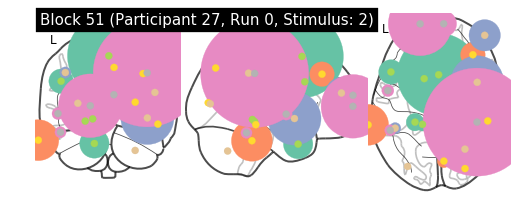

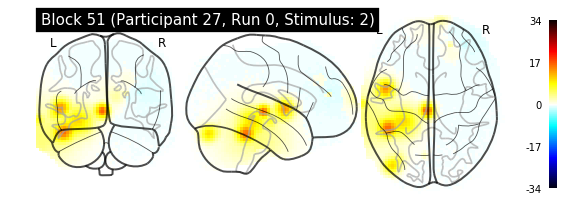

01/09/2019 11:57:35 Reconstruction Error (Frobenius Norm): 2.75206494e+03 out of 8.93015723e+03


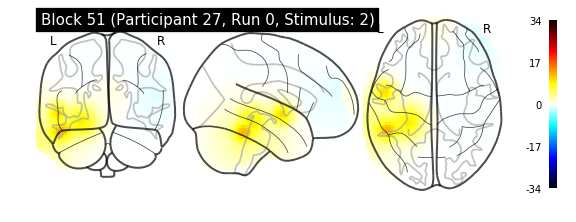

{'weights': tensor([[10.3426, -0.1467, -3.1116,  ...,  1.1960, -0.0596,  9.2623],
        [ 9.2529, -0.4730, -2.0551,  ...,  0.7498, -0.7404, 10.1261],
        [13.6189, -0.0613, -4.2094,  ..., -1.9934,  0.2499,  8.4450],
        ...,
        [ 9.2258, -0.1880, -2.7222,  ...,  1.7310,  0.0612,  9.9810],
        [14.1769, -0.3871, -4.0897,  ...,  0.2885, -0.4516,  9.3948],
        [10.8480, -0.1849, -2.1896,  ...,  0.6032, -0.1021, 10.1013]]), 'factors': tensor([[9.0613e-05, 7.3795e-05, 5.6723e-05,  ..., 1.5018e-16, 1.9422e-16,
         1.3188e-16],
        [2.3968e-05, 1.8556e-05, 1.4052e-05,  ..., 1.7006e-06, 1.5715e-06,
         2.2755e-06],
        [2.1653e-09, 1.6489e-09, 1.1390e-09,  ..., 9.0048e-24, 1.4955e-23,
         6.7064e-24],
        ...,
        [3.2928e-15, 3.8772e-15, 4.4379e-15,  ..., 2.2948e-12, 3.3882e-12,
         5.7164e-12],
        [1.5098e-02, 1.5198e-02, 1.5231e-02,  ..., 6.8186e-03, 7.1071e-03,
         7.8460e-03],
        [1.7024e-04, 5.8899e-05, 1.7665e-05,

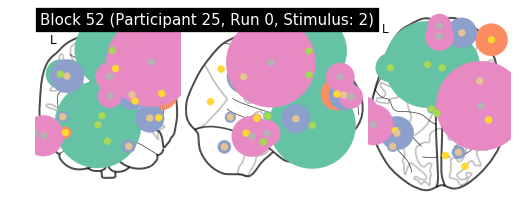

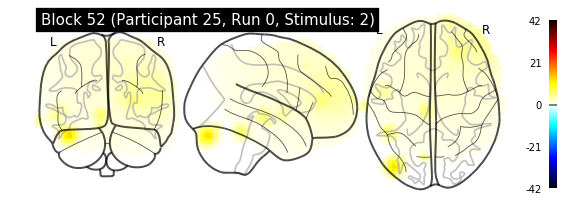

01/09/2019 11:58:03 Reconstruction Error (Frobenius Norm): 2.02276953e+03 out of 5.31042822e+03


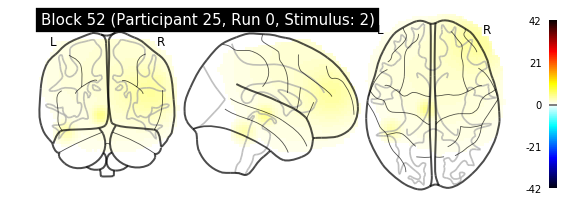

{'weights': tensor([[ 3.4687e+00,  6.4231e-01, -3.0109e-01,  ...,  2.2539e-02,
         -1.5918e-01, -3.3869e-02],
        [ 4.2772e+00, -4.5779e-01, -1.0606e-01,  ..., -3.2144e-01,
          1.2085e+00,  1.9324e+00],
        [ 3.9328e+00, -9.7061e-01, -4.7619e-01,  ..., -3.0510e-01,
         -3.6174e-03,  1.3570e+00],
        ...,
        [ 4.8312e+00, -6.4938e-01, -1.5103e-01,  ..., -1.7265e-01,
          2.1762e-01,  2.4269e+00],
        [ 4.4437e+00,  4.2460e-03, -1.4641e-01,  ..., -3.2542e-01,
          2.0575e+00,  1.8764e+00],
        [ 6.0660e+00,  3.8982e-01, -2.5927e-01,  ..., -2.8254e-01,
         -9.1145e-01,  3.5498e+00]]), 'factors': tensor([[1.2166e-26, 8.9142e-27, 5.3845e-27,  ..., 7.0259e-39, 2.4139e-38,
         1.1140e-38],
        [2.6016e-01, 2.5709e-01, 2.5346e-01,  ..., 2.1317e-01, 2.1473e-01,
         2.2255e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.8736e-09, 2.3830e-09, 2.9720e

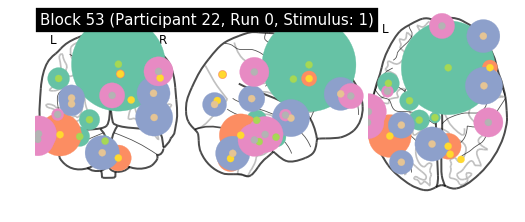

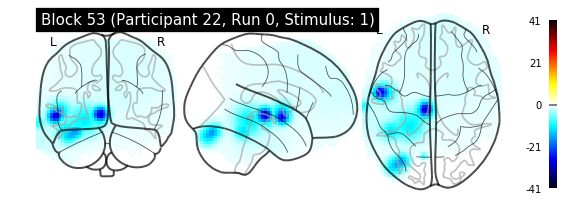

01/09/2019 11:58:32 Reconstruction Error (Frobenius Norm): 4.04297437e+03 out of 9.50100293e+03


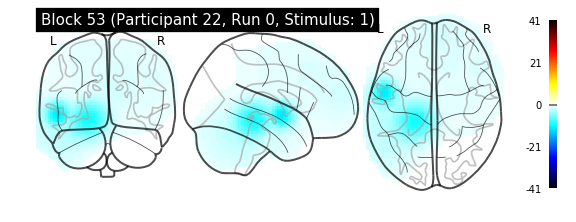

{'weights': tensor([[ -9.0900,   2.2755,  -0.5070,  ...,  -0.8384, -10.5513,   2.0731],
        [ -8.0399,   1.9577,  -0.1857,  ...,  -0.2943, -10.2177,  -0.3332],
        [ -8.1401,   2.0005,   1.3937,  ...,   1.0616, -10.8814,  -0.4951],
        ...,
        [ -9.1228,   2.4232,   1.4686,  ...,  -0.1809, -11.0080,   2.7071],
        [ -8.0247,   2.2828,   1.2327,  ...,  -4.1099, -11.2794,  -0.4524],
        [ -8.9844,   2.1995,  -0.2119,  ...,  -0.7503,  -9.4713,   0.9758]]), 'factors': tensor([[1.5472e-04, 1.3447e-04, 1.1157e-04,  ..., 1.8995e-12, 2.3923e-12,
         1.7693e-12],
        [2.0610e-05, 1.3495e-05, 8.4322e-06,  ..., 5.0956e-15, 4.8532e-15,
         6.5305e-15],
        [7.8474e-23, 1.7322e-23, 3.3170e-24,  ..., 1.9738e-25, 1.3582e-25,
         1.8157e-25],
        ...,
        [1.1328e-15, 1.3376e-15, 1.5319e-15,  ..., 3.4919e-13, 5.2679e-13,
         9.1512e-13],
        [9.1443e-09, 7.8847e-09, 6.0343e-09,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        

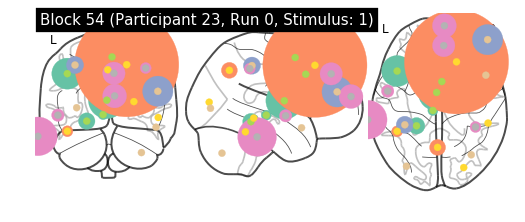

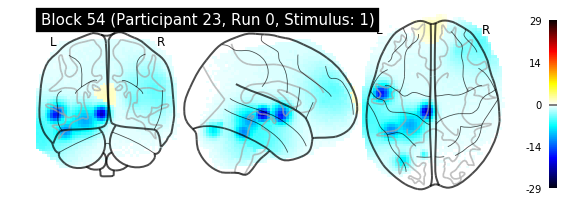

01/09/2019 11:59:00 Reconstruction Error (Frobenius Norm): 1.61987842e+03 out of 9.67469922e+03


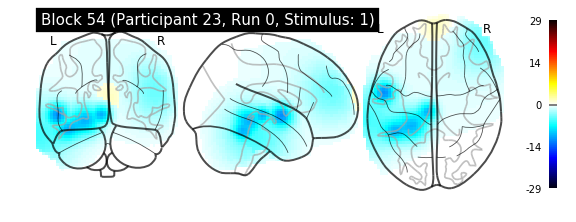

{'weights': tensor([[ -8.9940,  -0.1180,  -9.2445,  ...,  -0.2816,   2.6251,  -4.9777],
        [ -8.9144,  -0.2800, -12.8151,  ...,   0.0776,  -0.5017,  -6.0897],
        [ -9.4644,  -0.1303, -10.7303,  ...,   0.2887,  -1.4044,  -4.1606],
        ...,
        [ -6.4024,  -0.2018, -10.8047,  ...,   0.5138,   0.6812,  -4.8609],
        [ -7.5588,  -0.1209, -13.1498,  ...,   0.2924,  -2.7170,  -5.9666],
        [ -8.8213,  -0.0431, -11.6404,  ...,  -0.4298,  -3.5809,  -2.5091]]), 'factors': tensor([[5.2901e-24, 4.2166e-24, 2.8294e-24,  ..., 4.7891e-34, 1.5135e-33,
         6.5823e-34],
        [2.4842e-03, 2.6123e-03, 2.7104e-03,  ..., 1.6308e-03, 1.9089e-03,
         1.8248e-03],
        [2.6340e-05, 2.0946e-05, 1.5622e-05,  ..., 7.9742e-18, 1.0590e-17,
         6.3470e-18],
        ...,
        [4.9255e-33, 1.2895e-32, 3.1268e-32,  ..., 5.7838e-29, 2.7964e-28,
         3.8343e-28],
        [3.1745e-16, 3.7424e-16, 4.2769e-16,  ..., 4.0549e-13, 6.1288e-13,
         1.0814e-12],
        

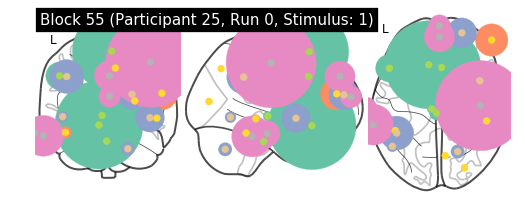

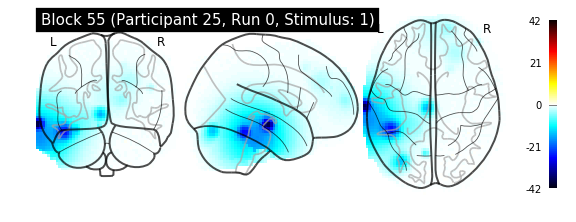

01/09/2019 11:59:29 Reconstruction Error (Frobenius Norm): 2.72623657e+03 out of 1.50006904e+04


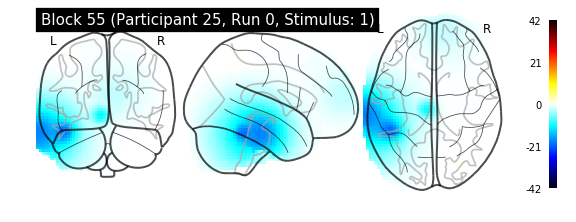

{'weights': tensor([[ -9.9411,   0.0479,   0.3014,  ...,  -0.2235,  -1.7963, -11.5636],
        [-12.1630,  -0.6227,  -0.2734,  ...,  -0.1011,  -0.8344, -10.5284],
        [-11.5356,   0.5521,   0.0320,  ...,   0.1220,  -0.3594, -11.8959],
        ...,
        [-11.2208,  -0.9959,   0.4348,  ...,  -0.1130,  -0.5328, -11.9495],
        [-12.7014,  -0.0959,   0.1515,  ...,  -0.0676,  -1.7891, -10.5385],
        [-13.3475,  -0.2680,   1.1715,  ...,  -0.2627,   0.2136, -12.3357]]), 'factors': tensor([[1.0861e-27, 7.8721e-28, 4.6685e-28,  ..., 2.6586e-40, 9.5929e-40,
         4.2916e-40],
        [2.6090e-01, 2.5800e-01, 2.5454e-01,  ..., 2.2886e-01, 2.3057e-01,
         2.3871e-01],
        [1.1751e-21, 3.0175e-22, 6.8062e-23,  ..., 4.6512e-23, 3.3705e-23,
         5.2182e-23],
        ...,
        [2.7502e-12, 3.7890e-12, 5.0859e-12,  ..., 1.2119e-11, 2.0556e-11,
         2.4883e-11],
        [1.6300e-13, 1.8702e-13, 2.0892e-13,  ..., 7.3941e-12, 1.0502e-11,
         1.7176e-11],
        

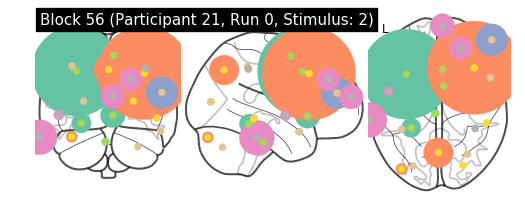

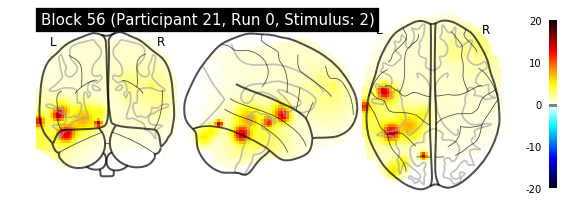

01/09/2019 11:59:58 Reconstruction Error (Frobenius Norm): 1.95154492e+03 out of 8.52456250e+03


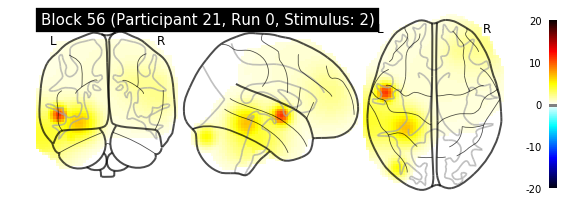

{'weights': tensor([[ 5.8114,  0.0361, -0.6134,  ...,  0.8733, -0.0931,  3.8724],
        [ 4.2042, -0.0109, -0.3769,  ..., -0.8080,  2.6965,  5.0962],
        [ 5.1074,  0.0738, -0.7318,  ...,  0.5196, -1.1291,  4.1956],
        ...,
        [ 3.4622,  0.1009, -0.4964,  ...,  0.4856,  0.6903,  4.6726],
        [ 2.9589,  0.0858, -0.1306,  ...,  0.4897, -1.9870,  6.2852],
        [ 4.6846, -0.0568, -0.8454,  ..., -0.9856,  0.1243,  5.5254]]), 'factors': tensor([[1.4910e-03, 1.2091e-03, 9.3375e-04,  ..., 3.5330e-15, 4.2357e-15,
         2.8783e-15],
        [1.9669e-07, 1.8932e-07, 1.7770e-07,  ..., 6.0778e-06, 7.1558e-06,
         8.9596e-06],
        [5.0273e-41, 3.2860e-42, 1.6535e-43,  ..., 1.4013e-45, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.7555e-34, 3.8938e-34, 8.0426e-34,  ..., 2.7026e-21, 1.0594e-20,
         1.4449e-20],
        [4.8712e-16, 5.7139e-16, 6.4967e-16,  ..., 2.5636e-13, 3.8573e-13,
         6.8539e-13],
        [4.2695e-01, 3.7171e-01, 3.1881e-01,

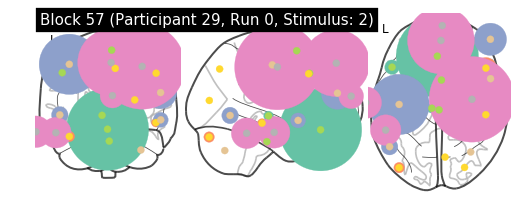

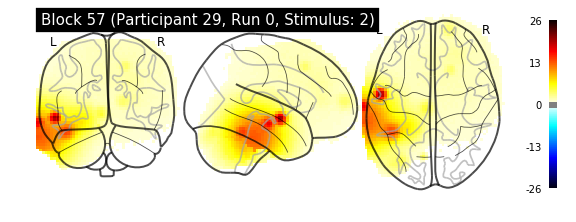

01/09/2019 12:00:26 Reconstruction Error (Frobenius Norm): 2.06733569e+03 out of 9.42772168e+03


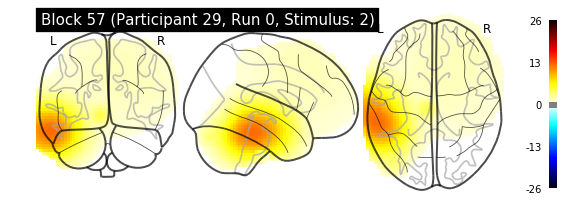

{'weights': tensor([[ 3.1173,  0.5063, -0.6738,  ...,  0.7818,  0.1094,  8.7340],
        [ 2.7607,  1.0385, -0.1233,  ...,  1.8023,  1.8911,  7.4568],
        [ 0.4996,  0.8707, -0.3304,  ...,  1.2854, -0.2788,  6.5819],
        ...,
        [ 2.7627,  0.5392, -0.8401,  ...,  1.1297,  0.4887,  5.9456],
        [-0.3442,  0.1661, -0.4368,  ...,  0.5677,  2.2223,  5.0250],
        [ 0.6942, -0.3827, -0.3031,  ..., -0.6112,  0.1209,  6.1534]]), 'factors': tensor([[8.4985e-27, 6.2923e-27, 3.8417e-27,  ..., 7.0937e-39, 2.4557e-38,
         1.1747e-38],
        [1.3069e-01, 1.2836e-01, 1.2572e-01,  ..., 1.8454e-01, 1.8535e-01,
         1.9568e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.2221e-02, 1.3107e-02, 1.3999e-02,  ..., 1.4913e-02, 1.6532e-02,
         1.6628e-02],
        [8.3012e-15, 9.6909e-15, 1.0994e-14,  ..., 2.1391e-12, 3.1393e-12,
         5.2879e-12],
        [3.7691e-01, 3.2522e-01, 2.7523e-01,

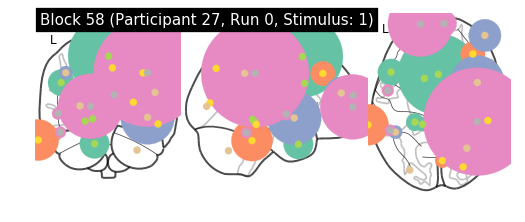

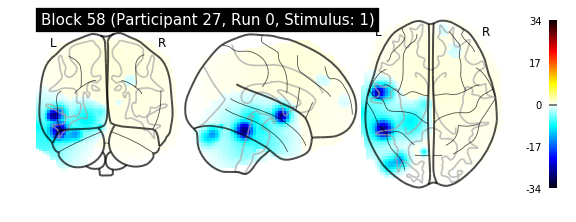

01/09/2019 12:00:54 Reconstruction Error (Frobenius Norm): 2.92842383e+03 out of 1.04150264e+04


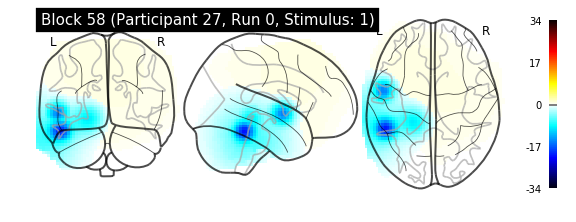

{'weights': tensor([[ -5.1334,   0.1564,  -4.7604,  ...,  -0.7547,   0.1298, -16.2765],
        [ -6.1385,   0.0237,  -4.7220,  ...,  -0.5023,  -0.4364, -14.9659],
        [ -4.4055,  -0.0246,  -4.9551,  ...,  -0.5001,  -0.1557, -14.9288],
        ...,
        [ -5.2181,  -0.0570,  -4.1719,  ...,   0.9243,  -0.4231, -16.4292],
        [ -7.3006,   0.0262,  -5.3901,  ...,  -0.9333,  -0.1745, -15.8607],
        [ -6.2493,   0.1026,  -5.7867,  ...,  -1.2675,  -0.0420, -16.2791]]), 'factors': tensor([[8.9138e-05, 7.2576e-05, 5.5766e-05,  ..., 1.3838e-16, 1.7909e-16,
         1.2151e-16],
        [1.0900e-04, 8.7306e-05, 6.8599e-05,  ..., 9.4519e-06, 8.8255e-06,
         1.2140e-05],
        [1.2798e-09, 9.7255e-10, 6.6828e-10,  ..., 1.2586e-24, 2.1398e-24,
         9.2809e-25],
        ...,
        [2.8019e-15, 3.2899e-15, 3.7542e-15,  ..., 1.8248e-12, 2.6919e-12,
         4.5792e-12],
        [7.3048e-03, 7.3645e-03, 7.3869e-03,  ..., 3.0222e-03, 3.1738e-03,
         3.5610e-03],
        

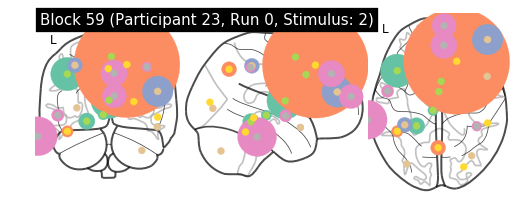

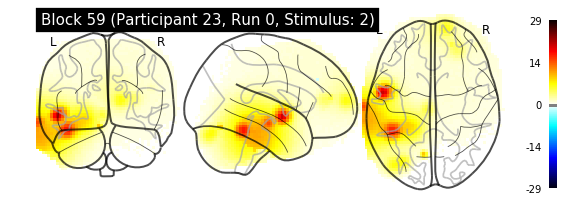

01/09/2019 12:01:23 Reconstruction Error (Frobenius Norm): 1.87497168e+03 out of 1.09408721e+04


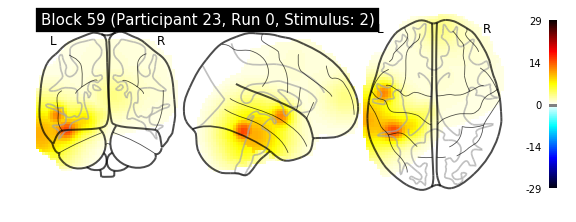

{'weights': tensor([[ 2.1646,  0.1511,  6.9415,  ..., -0.5727,  2.7665, 10.2910],
        [ 2.1511,  0.3179,  5.4086,  ...,  0.4678,  0.7312,  8.8075],
        [ 3.2475,  0.2961,  6.4010,  ..., -0.0618,  0.5614,  7.6076],
        ...,
        [ 2.1439, -0.1322,  5.2761,  ..., -0.4225,  0.2333, 11.0595],
        [ 2.2666, -0.1047,  5.8533,  ..., -0.3520,  0.6179,  9.0698],
        [ 1.5624,  0.3535,  5.6208,  ...,  0.1678,  3.2954,  9.7284]]), 'factors': tensor([[4.3050e-23, 3.4509e-23, 2.3468e-23,  ..., 2.2213e-32, 6.6343e-32,
         3.0217e-32],
        [2.2378e-03, 2.3566e-03, 2.4483e-03,  ..., 1.6002e-03, 1.8777e-03,
         1.7917e-03],
        [1.6271e-05, 1.2828e-05, 9.4565e-06,  ..., 1.1696e-18, 1.5781e-18,
         9.2123e-19],
        ...,
        [1.5221e-28, 3.5396e-28, 7.7064e-28,  ..., 2.8387e-25, 1.1183e-24,
         1.4476e-24],
        [6.2588e-17, 7.4276e-17, 8.5331e-17,  ..., 1.1210e-13, 1.7252e-13,
         3.1264e-13],
        [5.2914e-01, 4.7644e-01, 4.2396e-01,

In [11]:
for b in range(dtfa.num_blocks):
    if dtfa.generative.block_subjects[b] < 20:
        continue
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [12]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task %s' % block.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


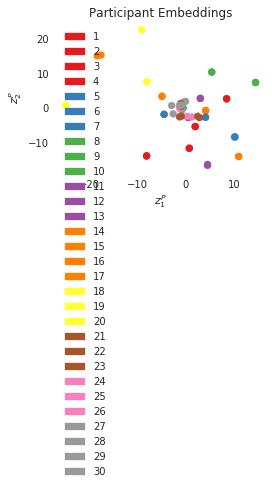

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


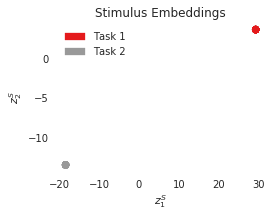

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

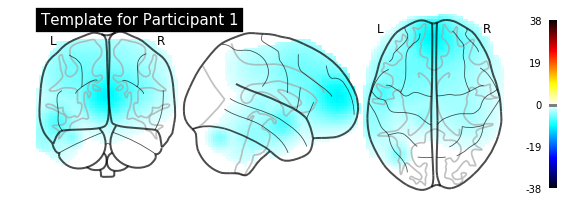

In [15]:
dtfa.plot_subject_template(1)

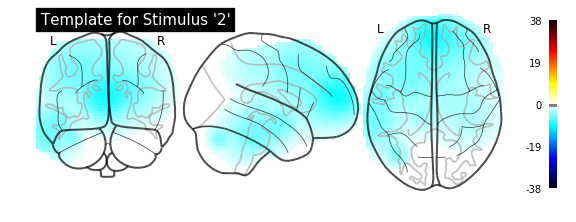

In [16]:
dtfa.plot_task_template('2')

In [17]:
def group_labeler(block):
    if block.subject <= 10:
        return 'Group 1'
    else:
        return 'Group 2'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


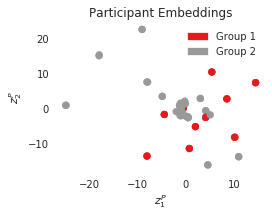

In [18]:
dtfa.scatter_subject_embedding(labeler=group_labeler)